In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import KNNImputer
import xgboost as xgb
import regex
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [2]:
# read data dictionary
telecom_data_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [3]:
telecom_data_dict.head()

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls


In [4]:
#read churn data
churn_df = pd.read_csv('telecom_churn_data.csv')

In [5]:
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
churn_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

# Data Cleaning
- Identifying all the missing values

In [8]:
def missing_value_percentages(df,offset=0):
    missing_val = pd.DataFrame(churn_df.isnull().sum()*100 / len(churn_df),columns = ['missing_val_percent'])
    missing_val = missing_val[missing_val.missing_val_percent>offset]
    return missing_val

In [9]:
missing_values = missing_value_percentages(churn_df)

In [10]:
#attributes with more than 50% data missing
missing_values[missing_values.missing_val_percent>50]

,missing_val_percent
date_of_last_rech_data_6,74.846748
date_of_last_rech_data_7,74.428744
date_of_last_rech_data_8,73.660737
date_of_last_rech_data_9,74.077741
total_rech_data_6,74.846748
total_rech_data_7,74.428744
total_rech_data_8,73.660737
total_rech_data_9,74.077741
max_rech_data_6,74.846748
max_rech_data_7,74.428744


### Imputing missing values with zero for amount and data. If the user had recharged the value would have been greater then zero.

In [11]:
rech_cols = [col for col in list(churn_df.columns) if 'rech' in col if 'date' not in col]
rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [12]:
churn_df[rech_cols] = churn_df[rech_cols].apply(lambda x: x.fillna(0))

In [13]:
#checking missing values for remaining attributes
missing_values = missing_value_percentages(churn_df)
missing_values[missing_values.missing_val_percent>50]

,missing_val_percent
date_of_last_rech_data_6,74.846748
date_of_last_rech_data_7,74.428744
date_of_last_rech_data_8,73.660737
date_of_last_rech_data_9,74.077741
arpu_3g_6,74.846748
arpu_3g_7,74.428744
arpu_3g_8,73.660737
arpu_3g_9,74.077741
arpu_2g_6,74.846748
arpu_2g_7,74.428744


### Imputing Arpu columns missing values with zero as they are numerical and zero suggest the user has not recharged or used the service

In [14]:
arpu_cols = [col for col in list(churn_df.columns) if 'arpu' in col if '2g' in col or '3g' in col]
arpu_cols

['arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [15]:
churn_df[arpu_cols] = churn_df[arpu_cols].apply(lambda x : x.fillna(0))

### For `Night Pack User` and `FB User` creating an unknown category `-1`

<AxesSubplot:xlabel='night_pck_user_6', ylabel='count'>

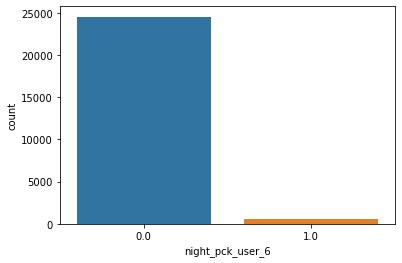

In [16]:
night_pack_col = [col for col in churn_df if 'night_pck' in col]
fb_col = [col for col in churn_df if 'fb_user' in col]
sns.countplot(data = churn_df, x = 'night_pck_user_6')

In [17]:
churn_df[night_pack_col+fb_col] = churn_df[night_pack_col+fb_col].apply(lambda x : x.fillna(-1))

In [18]:
missing_val = missing_value_percentages(churn_df)
missing_val[missing_val.missing_val_percent>50]

,missing_val_percent
date_of_last_rech_data_6,74.846748
date_of_last_rech_data_7,74.428744
date_of_last_rech_data_8,73.660737
date_of_last_rech_data_9,74.077741


### As we already have lot of information available metrics based on time we can drop date columns

In [19]:
churn_df = churn_df.drop(columns = [col for col in churn_df.columns if 'date' in col])

### Remaining columns with missing values

In [20]:
missing_val = missing_value_percentages(churn_df)
missing_val

,missing_val_percent
loc_og_t2o_mou,1.018010
std_og_t2o_mou,1.018010
loc_ic_t2o_mou,1.018010
onnet_mou_6,3.937039
onnet_mou_7,3.859039
onnet_mou_8,5.378054
onnet_mou_9,7.745077
offnet_mou_6,3.937039
offnet_mou_7,3.859039
offnet_mou_8,5.378054


In [21]:
churn_df[missing_val.index].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,98981.0,98981.0,98981.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,0.0,0.0,0.0,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,86.276622,1.129011,1.115010,1.067792,1.042362,0.0,0.0,0.0,0.0,168.261218,175.221436,174.191498,169.664466,0.798277,0.776572,0.791247,0.723892,3.916811,4.978279,5.053769,4.412767,0.454157,0.030235,0.033372,0.047456,47.922365,47.990520,47.211362,46.281794,107.475650,107

In [22]:
# Understanding datatype of remaining columns with missing values
churn_df[missing_val.index].dtypes

loc_og_t2o_mou      float64
std_og_t2o_mou      float64
loc_ic_t2o_mou      float64
onnet_mou_6         float64
onnet_mou_7         float64
onnet_mou_8         float64
onnet_mou_9         float64
offnet_mou_6        float64
offnet_mou_7        float64
offnet_mou_8        float64
offnet_mou_9        float64
roam_ic_mou_6       float64
roam_ic_mou_7       float64
roam_ic_mou_8       float64
roam_ic_mou_9       float64
roam_og_mou_6       float64
roam_og_mou_7       float64
roam_og_mou_8       float64
roam_og_mou_9       float64
loc_og_t2t_mou_6    float64
loc_og_t2t_mou_7    float64
loc_og_t2t_mou_8    float64
loc_og_t2t_mou_9    float64
loc_og_t2m_mou_6    float64
loc_og_t2m_mou_7    float64
loc_og_t2m_mou_8    float64
loc_og_t2m_mou_9    float64
loc_og_t2f_mou_6    float64
loc_og_t2f_mou_7    float64
loc_og_t2f_mou_8    float64
loc_og_t2f_mou_9    float64
loc_og_t2c_mou_6    float64
loc_og_t2c_mou_7    float64
loc_og_t2c_mou_8    float64
loc_og_t2c_mou_9    float64
loc_og_mou_6        

### Handled the columns having more than 50% missing values, using `sklearn.impute` to fix columns with missing values ranging between 1% - 10%
- As all columns are of type float we can replace them with their median using `sklearn.impute.SimpleImputer`
#### Note : 
- I tried installing __fancyimpute__, found a lot issue regarding mismatch on api version(numpy, cvxpy), so decided to go with __sklearn.impute__
- I initially used __KNNImputer__ from sklearn which was taking lot of time, so I opted to go with __SimpleImputer__ as all the columns are of type float and they do not have missing value more than `7%`

In [23]:
simp = SimpleImputer(strategy = 'median')
churn_df[missing_val.index] = simp.fit_transform(churn_df[missing_val.index])


### All the missing values are handled

In [24]:
churn_df.isnull().sum()[churn_df.isnull().sum()>0]

Series([], dtype: int64)

# Filtering High-Value Customers

In [25]:
churn_df['total_rech_data_6'] = churn_df['av_rech_amt_data_6'] * churn_df['total_rech_data_6']
churn_df['total_rech_data_7'] = churn_df['av_rech_amt_data_7'] * churn_df['total_rech_data_7']

In [26]:
churn_df['total_rech_amt_6'] = churn_df['total_rech_data_6'] + churn_df['total_rech_amt_6']
churn_df['total_rech_amt_7'] = churn_df['total_rech_data_7'] + churn_df['total_rech_amt_7']


In [27]:
churn_df['avg_rech_6_7'] = (churn_df['total_rech_amt_6'] + churn_df['total_rech_amt_7'])/2

In [28]:
churn_df['avg_rech_6_7'].describe(percentiles=[0,0.2,0.5,0.7,0.9,1])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
0%           0.000000
20%        108.500000
50%        275.000000
70%        478.000000
90%       1028.000000
100%     61236.000000
max      61236.000000
Name: avg_rech_6_7, dtype: float64

In [29]:
high_val_df = churn_df[churn_df.avg_rech_6_7>=churn_df['avg_rech_6_7'].quantile(0.7)]

In [30]:
high_val_df.shape

(30001, 215)

# Tagging Churn

In [31]:
high_val_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,30001.000000,30001.000000,30001.000000,30001.000000
mean,264.901497,500.869219,91.435910,349.513848
std,358.290694,666.902007,282.370006,947.079372
min,0.000000,0.000000,0.000000,0.000000
25%,50.480000,47.640000,0.000000,0.000000
50%,157.980000,284.940000,0.000000,0.000000
75%,343.540000,698.680000,38.000000,320.610000
max,7785.730000,11517.730000,8993.950000,39221.270000


In [32]:
# total incoming and outgoing calls
high_val_df['total_ic_og_mou_9'] = high_val_df.total_ic_mou_9 + high_val_df.total_og_mou_9
# total data usage
high_val_df['total_data_usage_9'] = high_val_df.vol_3g_mb_9 + high_val_df.vol_2g_mb_9
# tagging churn if the total usage is 0
high_val_df['churn'] = high_val_df['total_ic_og_mou_9']  + high_val_df['total_data_usage_9']
high_val_df.churn = high_val_df.churn.apply(lambda x : 1 if x==0 else 0)

In [33]:
high_val_df.churn.value_counts()/len(high_val_df)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

In [34]:
col_9 = [col for col in high_val_df.columns if '_9' in col]
high_val_df_9 = high_val_df[col_9]
high_val_df_9.shape

(30001, 53)

In [35]:
#dropping all columns related to 9th month
high_val_df = high_val_df.drop(columns=col_9)

In [36]:
high_val_df.shape

(30001, 165)

In [37]:
unique_col = list(high_val_df.nunique()[high_val_df.nunique()==1].index)

In [38]:
#dropping columns with one value as they do not have much significance
high_val_df = high_val_df.drop(columns = unique_col)

In [39]:
# we can drop mobile number as it's unique and does not determine churn
high_val_df = high_val_df.drop(columns = ['mobile_number'])


In [40]:
high_val_df.shape

(30001, 154)

### Calculating difference between 8th and previous months
- With this difference we can identify patterns where usage is declining and therefore indicating a possible churn

In [41]:
def perform_diff(diff_col,df):
    for col in diff_col:
        col_8 = col+'_8'
        col_6 = col+'_6'
        col_7 = col+'_7'
        diff_str = col+'_diff'
        df[diff_str] = df[col_8] - (df[col_6]+df[col_7])/2
    return df

In [42]:
cat_cols = set([col for col in high_val_df.columns if ('night_pck_user' in col) or ('fb_user' in col)])
numeric_cols = list(set(list(high_val_df.columns)) - cat_cols)


In [43]:
diff_col = [col.replace('_8','') for col in numeric_cols if '_8' in col]
diff_col

['std_og_t2f_mou',
 'max_rech_amt',
 'og_others',
 'max_rech_data',
 'loc_og_t2c_mou',
 'spl_og_mou',
 'loc_ic_t2f_mou',
 'monthly_3g',
 'count_rech_2g',
 'roam_og_mou',
 'loc_og_t2f_mou',
 'isd_ic_mou',
 'last_day_rch_amt',
 'sachet_2g',
 'total_rech_num',
 'std_ic_t2m_mou',
 'ic_others',
 'vol_3g_mb',
 'std_og_t2m_mou',
 'loc_ic_mou',
 'std_ic_mou',
 'total_og_mou',
 'loc_og_t2t_mou',
 'spl_ic_mou',
 'av_rech_amt_data',
 'vol_2g_mb',
 'sachet_3g',
 'monthly_2g',
 'loc_ic_t2t_mou',
 'arpu_2g',
 'loc_og_mou',
 'isd_og_mou',
 'onnet_mou',
 'total_ic_mou',
 'offnet_mou',
 'std_og_t2t_mou',
 'arpu',
 'total_rech_data',
 'arpu_3g',
 'loc_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_t2t_mou',
 'total_rech_amt',
 'count_rech_3g',
 'roam_ic_mou',
 'loc_og_t2m_mou',
 'std_og_mou']

In [44]:
high_val_df = perform_diff(diff_col,high_val_df)

In [45]:
high_val_df[[col for col in high_val_df if 'diff' in col]].describe()

,std_og_t2f_mou_diff,max_rech_amt_diff,og_others_diff,max_rech_data_diff,loc_og_t2c_mou_diff,spl_og_mou_diff,loc_ic_t2f_mou_diff,monthly_3g_diff,count_rech_2g_diff,roam_og_mou_diff,loc_og_t2f_mou_diff,isd_ic_mou_diff,last_day_rch_amt_diff,sachet_2g_diff,total_rech_num_diff,std_ic_t2m_mou_diff,ic_others_diff,vol_3g_mb_diff,std_og_t2m_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,total_og_mou_diff,loc_og_t2t_mou_diff,spl_ic_mou_diff,av_rech_amt_data_diff,vol_2g_mb_diff,sachet_3g_diff,monthly_2g_diff,loc_ic_t2t_mou_diff,arpu_2g_diff,loc_og_mou_diff,isd_og_mou_diff,onnet_mou_diff,total_ic_mou_diff,offnet_mou_diff,std_og_t2t_mou_diff,arpu_diff,total_rech_data_diff,arpu_3g_diff,loc_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_t2t_mou_diff,total_rech_amt_diff,count_rech_3g_diff,roam_ic_mou_diff,loc_og_t2m_mou_diff,std_og_mou_diff
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,-0.230066,-10.598813,-0.294391,-6.467768,-0.024744,0.093746,-1.233765,-0.012366,-0.110430,-3.496201,-0.497514,-0.331985,-8.231159,-0.085180,-1.812056,-2.043527,-0.102438,-5.733637,-26.265893,-7.459544,-3.392863,-67.437337,-6.755474,-0.013833,-13.085795,-19.896683,-0.016049,-0.025249,-3.081770,-5.675100,-17.53764,-0.189665,-29.52829,-13.430810,-38.911683,-21.618459,-51.038557,-490.383536,-5.041000,-3.530970,-0.185179,-1.244436,-568.255174,-0.028416,-1.875878,-10.524962,-47.973531
std,7.536745,136.893018,3.318381,78.343307,6.974352,18.088160,29.493607,0.474128,1.878156,94.165541,14.046863,56.736330,145.251806,1.867673,6.755899,74.400786,9.582714,624.877555,303.704202,179.429994,98.200314,502.630069,138.163474,0.174520,148.249896,256.114926,0.871149,0.353771,101.913727,116.362092,212.92811,14.001271,308.19445,221.899902,347.579120,273.056056,334.872321,1236.999774,130.961477,134.137634,13.707181,58.644175,1316.414177,0.992313,65.972062,147.764231,427.726689
min,-314.280000,-3010.000000,-304.905000,-1303.000000,-384.385000,-1081.910000,-928.210000,-7.500000,-25.500000,-2410.835000,-1319.850000,-5534.595000,-3065.000000,-26.000000,-147.500000,-2624.905000,-408.240000,-12385.505000,-7037.535000,-3747.225000,-2777.350000,-7213.410000,-3875.375000,-16.280000,-3486.500000,-4740.925000,-21.500000,-3.000000,-3021.870000,-2980.040000,-3867.83000,-619.650000,-5295.31500,-5710.150000,-7094.390000,-5391.210000,-5811.052500,-56475.500000,-2944.290000,-2384.855000,-636.500000,-2897.680000,-60299.000000,-21.500000,-1296.985000,-2863.535000,-7127.425000
25%,0.000000,-33.000000,0.000000,-7.000000,-0.365000,-2.750000,-2.975000,0.000000,-0.500000,0.000000,-1.210000,0.000000,-52.000000,0.000000,-4.000000,-7.345000,-0.025000,-2.270000,-25.795000,-48.455000,-11.685000,-168.025000,-16.385000,0.000000,-59.000000,-21.120000,0.000000,0.000000,-14.855000,-10.545000,-58.06500,0.000000,-51.48500,-67.230000,-98.855000,-12.160000,-180.179500,-499.000000,-4.080000,-33.810000,-0.115000,-2.830000,-703.500000,0.000000,0.000000,-38.160000,-54.460000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,-0.240000,0.000000,0.000000,-0.215000,-3.270000,-0.655000,-14.625000,-0.995000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.980000,0.000000,-4.53500,0.000000,-3.19000,-5.610000,-10.915000,0.000000,-40.754500,-153.000000,0.000000,-1.810000,0.000000,0.000000,-336.000000,0.000000,0.000000,-2.850000,-0.640000
75%,0.000000,25.000000,0.000000,0.000000,0.000000,1.310

In [46]:
high_val_df.shape

(30001, 201)

# EDA

<AxesSubplot:xlabel='arpu_diff', ylabel='Density'>

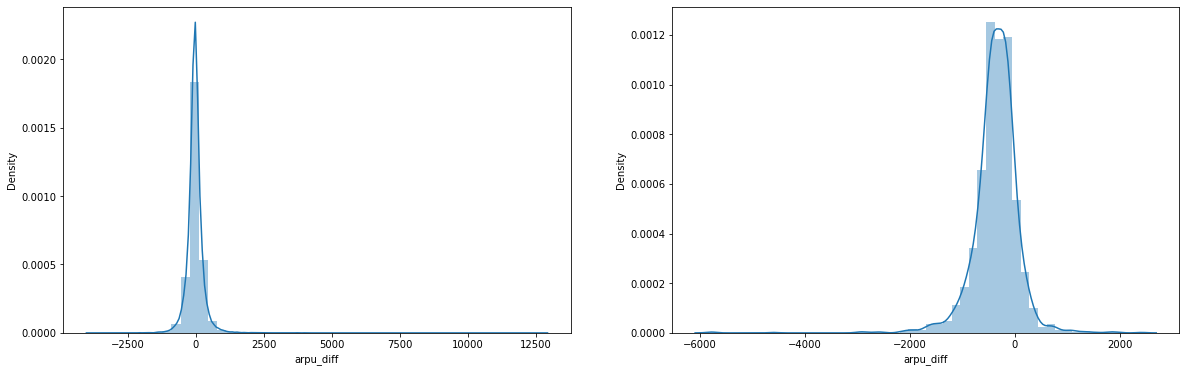

In [47]:
f,axes = plt.subplots(1,2,figsize=(20,6))
sns.distplot(high_val_df[high_val_df.churn==0].arpu_diff,ax = axes[0])
sns.distplot(high_val_df[high_val_df.churn==1].arpu_diff,ax = axes[1])

Arpu has more density for churned customers

<AxesSubplot:xlabel='roam_og_mou_diff', ylabel='Density'>

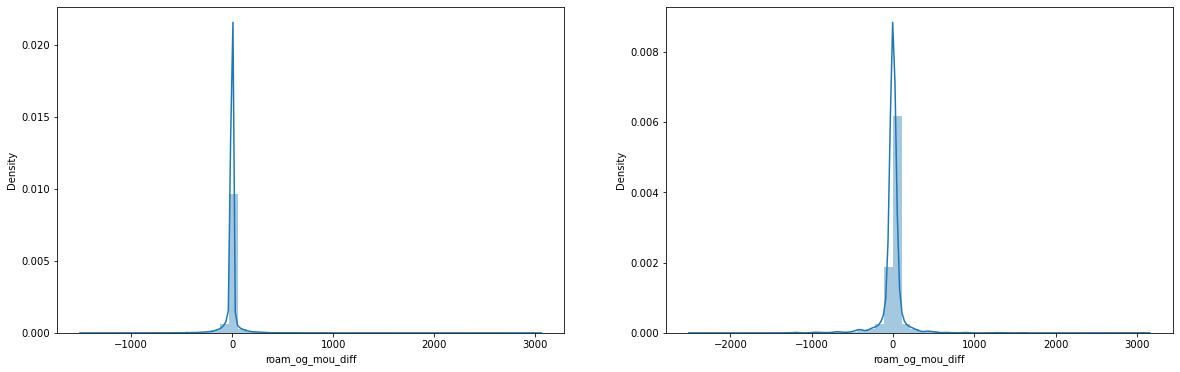

In [48]:
f,axes = plt.subplots(1,2,figsize=(20,6))
sns.distplot(high_val_df[high_val_df.churn==0].roam_og_mou_diff,ax = axes[0])
sns.distplot(high_val_df[high_val_df.churn==1].roam_og_mou_diff,ax = axes[1])

<AxesSubplot:xlabel='avg_rech_6_7', ylabel='Density'>

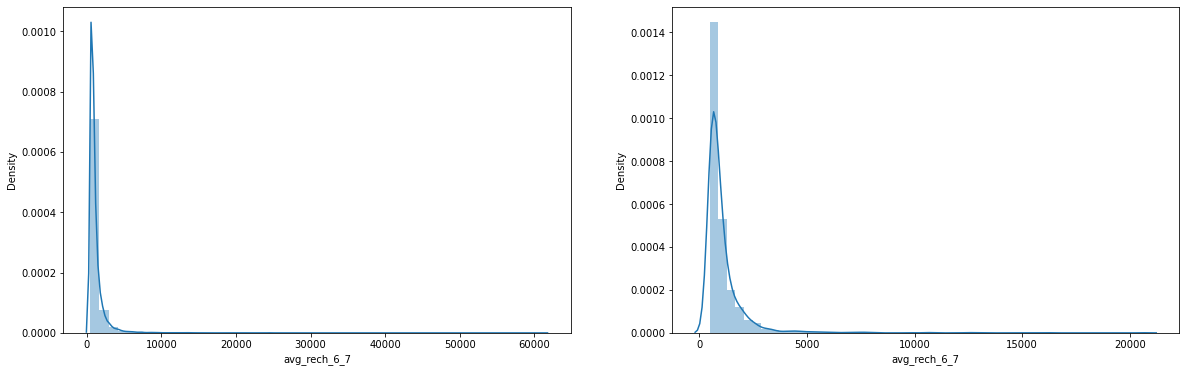

In [49]:

f,axes = plt.subplots(1,2,figsize=(20,6))
sns.distplot(high_val_df[high_val_df.churn==0].avg_rech_6_7,ax = axes[0])
sns.distplot(high_val_df[high_val_df.churn==1].avg_rech_6_7,ax = axes[1])

<AxesSubplot:xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

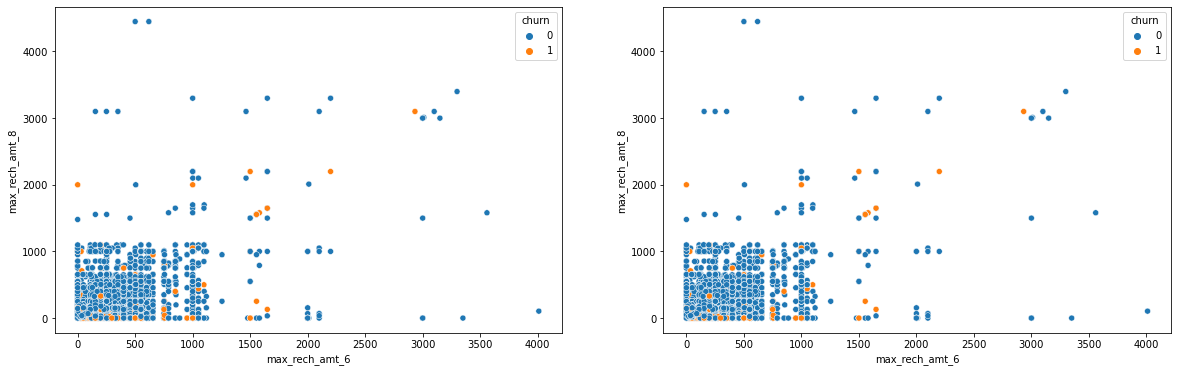

In [50]:
f,axes = plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(data =high_val_df, x = 'max_rech_amt_6', y = 'max_rech_amt_8',hue = 'churn',ax = axes[0])
sns.scatterplot(data =high_val_df, x = 'max_rech_amt_6', y = 'max_rech_amt_8',hue = 'churn',ax = axes[1])


In [51]:
high_val_df['aon'] = high_val_df['aon'].apply(lambda x : x/(30*12))


In [52]:
high_val_df.aon.describe()

count    30001.000000
mean         3.359358
std          2.660217
min          0.500000
25%          1.277778
50%          2.350000
75%          4.877778
max         12.002778
Name: aon, dtype: float64

In [53]:
high_val_df['customer_age'] = pd.cut(x=high_val_df['aon'], bins=np.arange(0,13,3))


In [54]:
high_val_df = high_val_df.drop(columns = ['aon'])

<AxesSubplot:xlabel='customer_age', ylabel='count'>

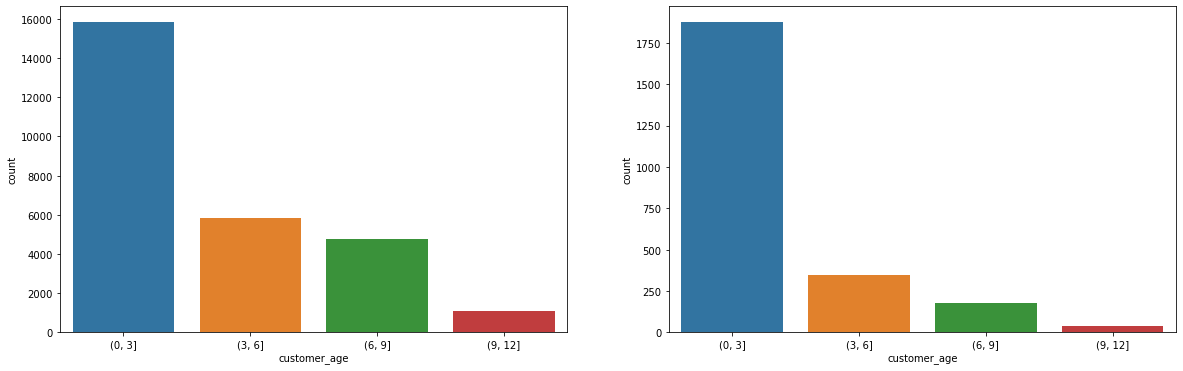

In [55]:

f,axes = plt.subplots(1,2,figsize=(20,6))
sns.countplot(high_val_df[high_val_df.churn==0].customer_age,ax = axes[0])
sns.countplot(high_val_df[high_val_df.churn==1].customer_age,ax = axes[1])

### Customer after 4 years tend to stick with the network for longer and churn rate is high in 0-3 years 

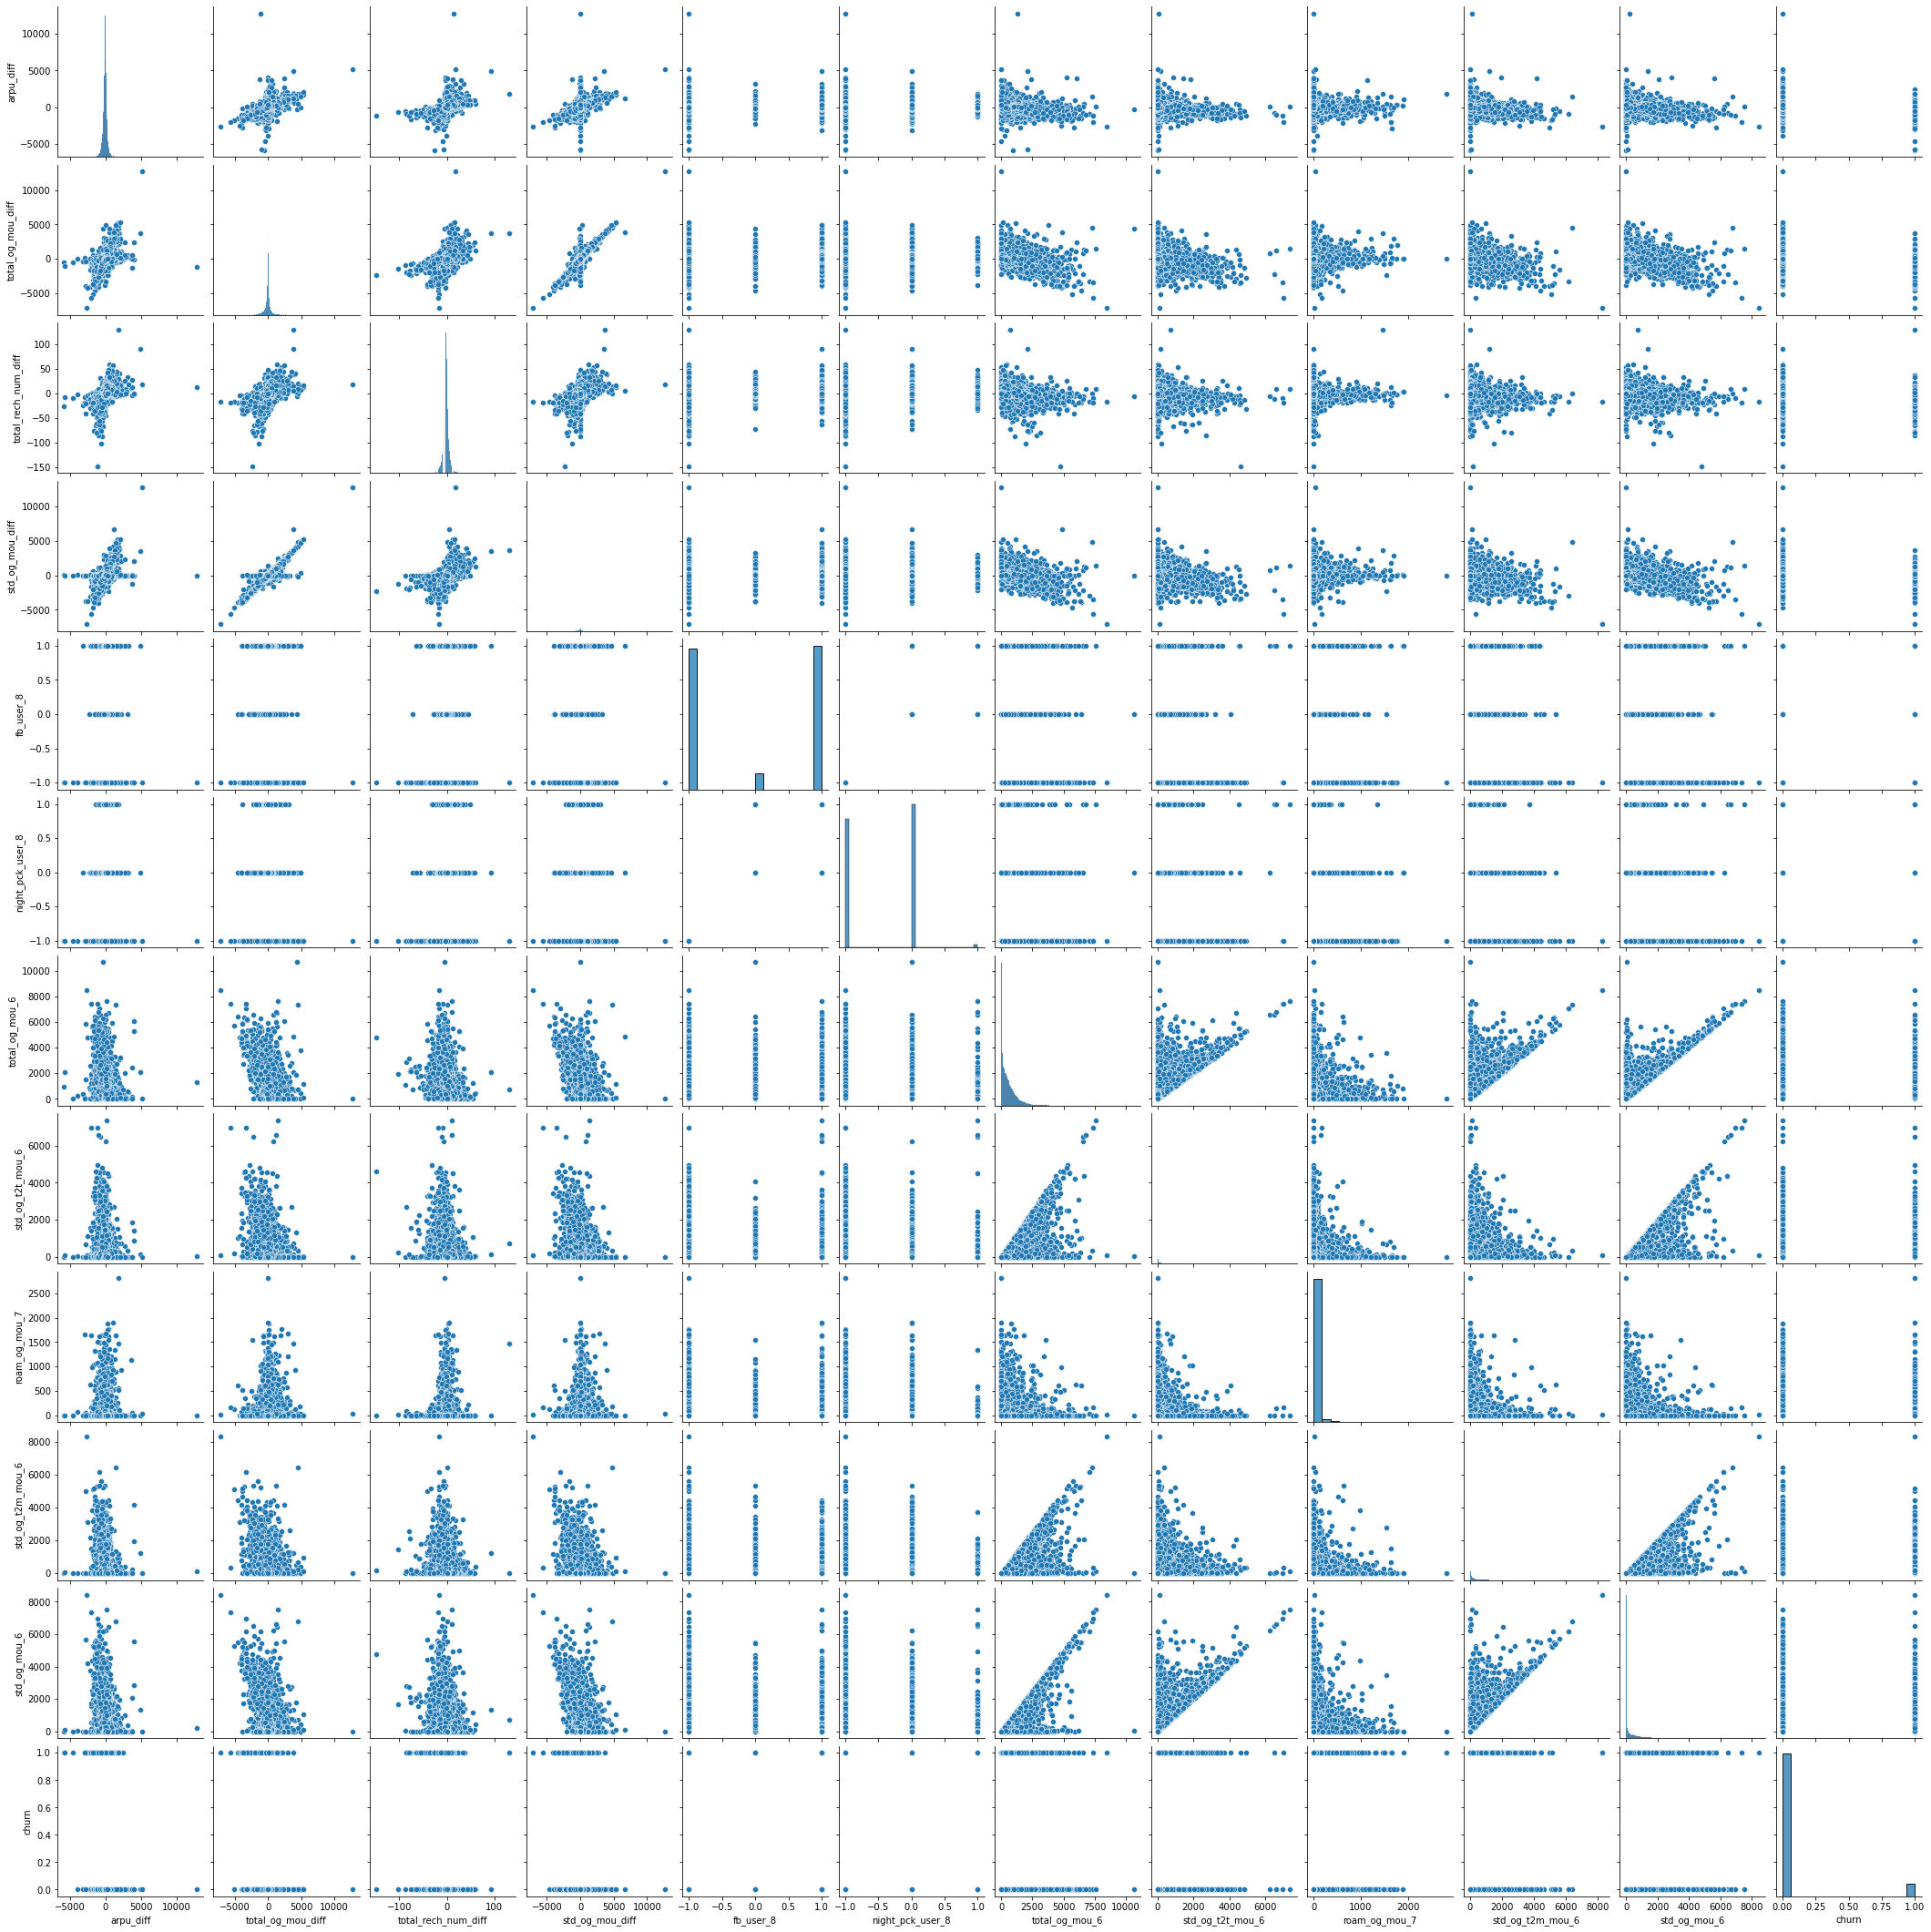

In [56]:
churn_corr = high_val_df.corr()['churn'].sort_values()
top_10 = churn_corr.index[:6]
bottom_10 = churn_corr.index[-6:]
sns.pairplot(high_val_df[list(top_10)+list(bottom_10)])

# Data Preparation

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA,IncrementalPCA

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [58]:

X = high_val_df.drop(columns = ['churn'])
y = high_val_df.churn


In [59]:
cat_cols = set([col for col in X.columns if ('night_pck_user' in col) or ('fb_user' in col)])
numeric_cols = list(set(list(X.columns)) - cat_cols)

In [60]:
df_categorical = X.select_dtypes(include=['object','category'])
df_categorical.head()

,customer_age
0,"(0, 3]"
7,"(0, 3]"
8,"(0, 3]"
21,"(0, 3]"
23,"(0, 3]"


In [61]:
#creating dummy variables for customer_age
df_dummies = pd.get_dummies(X.customer_age,drop_first = True)
df_dummies.head()

,"(3, 6]","(6, 9]","(9, 12]"
0,0,0,0
7,0,0,0
8,0,0,0
21,0,0,0
23,0,0,0


In [62]:
X = X.drop(columns = list(df_categorical.columns))

In [63]:
X = pd.concat([X,df_dummies],axis = 1 )

In [64]:
scaler = StandardScaler()
X_df = scaler.fit_transform(X.values)
X_scaled = pd.DataFrame(X_df, index=X.index, columns=X.columns)


In [65]:
pd.options.display.float_format = '{:,.5f}'.format

X_scaled.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,std_og_t2f_mou_diff,max_rech_amt_diff,og_others_diff,max_rech_data_diff,loc_og_t2c_mou_diff,spl_og_mou_diff,loc_ic_t2f_mou_diff,monthly_3g_diff,count_rech_2g_diff,roam_og_mou_diff,loc_og_t2f_mou_diff,isd_ic_mou_diff,last_day_rch_amt_diff,sachet_2g_diff,total_rech_num_diff,std_ic_t2m_mou_diff,ic_others_diff,vol_3g_mb_diff,std_og_t2m_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,total_og_mou_diff,loc_og_t2t_mou_diff,spl_ic_mou_diff,av_rech_amt_data_diff,vol_2g_mb_diff,sachet_3g_diff,monthly_2g_diff,loc_ic_t2t_mou_diff,arpu_2g_diff,loc_og_mou_diff,isd_og_mou_diff,onnet_mou_diff,total_ic_mou_diff,offnet_mou_diff,std_og_t2t_mou_diff,arpu_diff,total_rech_data_diff,arpu_3g_diff,loc_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_t2t_mou_diff,total_rech_amt_diff,count_rech_3g_diff,roam_ic_mou_diff,loc_og_t2m_mou_diff,std_og_mou_diff,"(3, 6]","(6, 9]","(9, 12]"
count,"30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.00000","30,001.0000

In [66]:
#Handling data imbalance for train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled, y,train_size=0.7,stratify = y,random_state=100)

In [67]:
#dataset are equaly distributed
y_train.value_counts()/len(y_train)

0   0.91862
1   0.08138
Name: churn, dtype: float64

In [68]:
y_test.value_counts()/len(y_test)

0   0.91868
1   0.08132
Name: churn, dtype: float64

In [69]:
# Handling class imbalance on churn data
from imblearn.over_sampling import SMOTE

#### Reference [article](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/) I have referred for SMOTE

In [70]:
sm = SMOTE(random_state = 100)
X_sm, y_sm = sm.fit_sample(X_train,y_train.ravel())

<AxesSubplot:ylabel='count'>

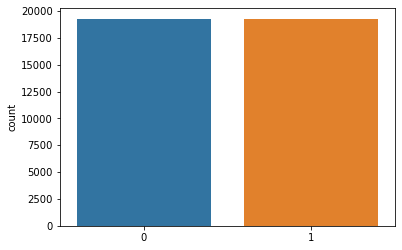

In [71]:
sns.countplot(y_sm)

In [72]:
X_sm.shape

(38582, 202)

# Modelling

In [73]:
def get_metrics(y_test,y_test_pred):
    print("Confusion Matrix : ")
    print(confusion_matrix(y_test,y_test_pred))
    print("Accuracy Score: ", accuracy_score(y_test,y_test_pred))
    print(classification_report(y_test,y_test_pred))
    print("AOC : {:.2f}%".format(roc_auc_score(y_test, y_test_pred)*100))
    sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
    print("Sensitivity: ", round(sensitivity, 3))
    print("Specificity: ", round(specificity, 3))

### PCA

In [74]:
pca = PCA(random_state=100)

In [75]:
pca.fit(X_sm)

PCA(random_state=100)

In [76]:
cum_exp_ratio = np.cumsum(pca.explained_variance_ratio_)

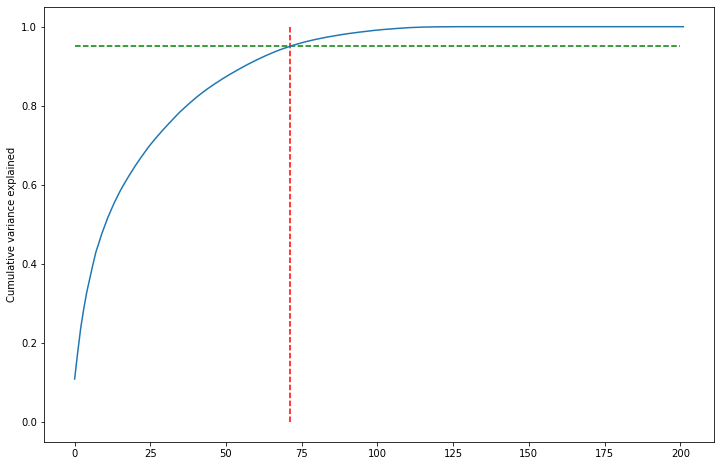

In [77]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=71, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=200, xmin=0, colors="g", linestyles="--")
plt.plot(cum_exp_ratio)
plt.ylabel("Cumulative variance explained")
plt.show()

### Performing PCA with 71 components

In [78]:
pd.DataFrame(cum_exp_ratio)

,0
0,0.10889
1,0.17535
2,0.23740
3,0.28592
4,0.32852
5,0.36333
6,0.39724
7,0.42937
8,0.45346
9,0.47685


In [79]:
pca_final = IncrementalPCA(n_components=71)

In [80]:
X_train_pca = pca_final.fit_transform(X_sm)

In [81]:
X_train_pca.shape

(38582, 71)

In [82]:
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(71, 71)

<AxesSubplot:>

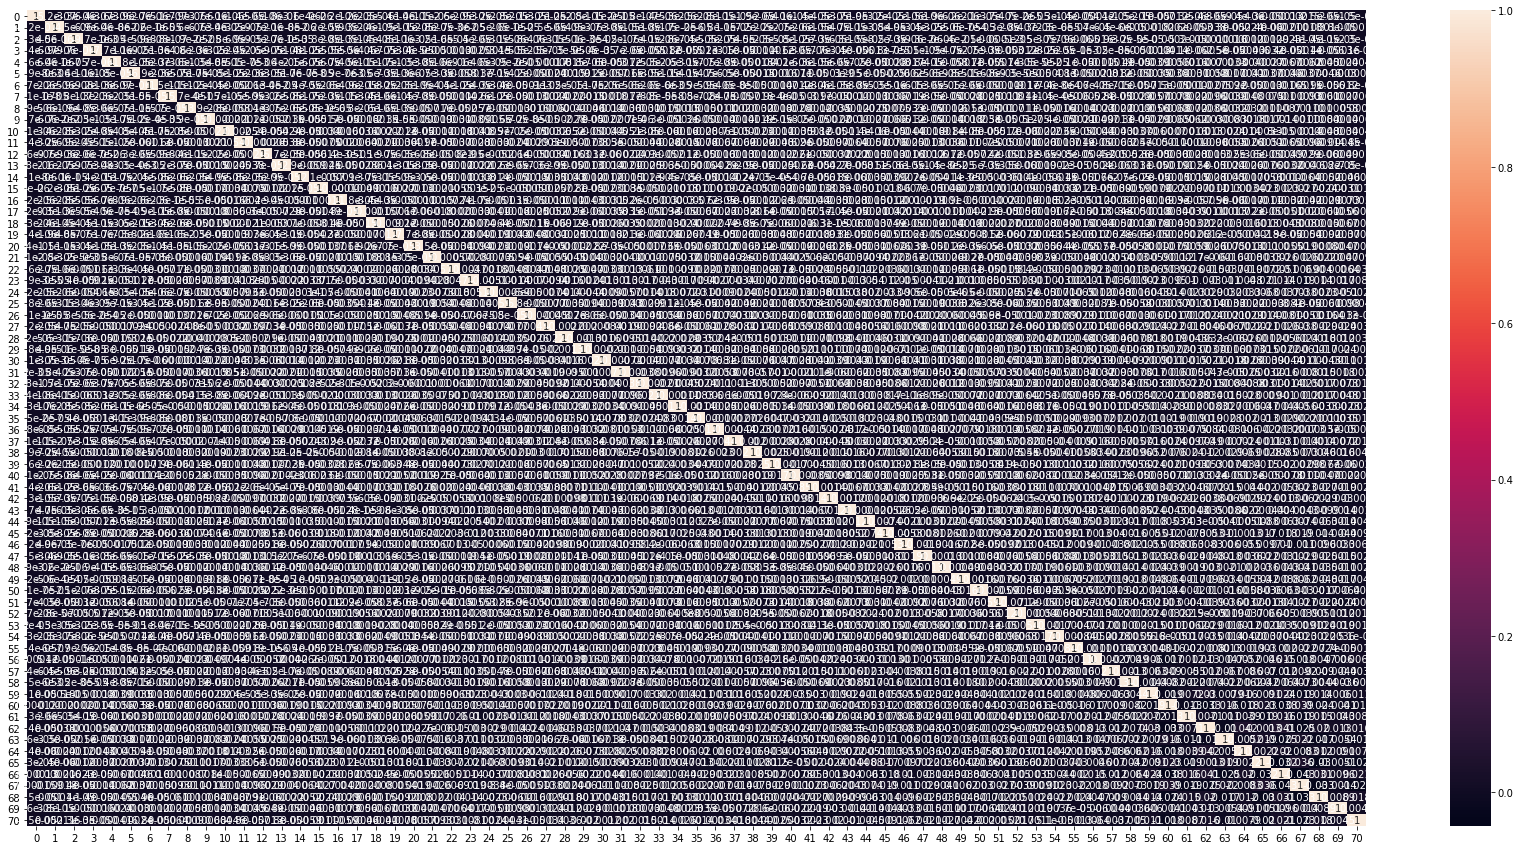

In [83]:
plt.figure(figsize=[30,15])
sns.heatmap(corrmat, annot=True)

In [84]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 71)

In [85]:
logreg = LogisticRegression()
log_pca = logreg.fit(X_train_pca,y_sm)

In [86]:
y_test_pred = log_pca.predict(X_test_pca)

In [87]:
get_metrics(y_test,y_test_pred)

Confusion Matrix : 
[[6807 1462]
 [ 136  596]]
Accuracy Score:  0.8224641706477058
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8269
           1       0.29      0.81      0.43       732

    accuracy                           0.82      9001
   macro avg       0.64      0.82      0.66      9001
weighted avg       0.92      0.82      0.86      9001

AOC : 81.87%
Sensitivity:  0.814
Specificity:  0.823


### PCA using Logistic Regression and L1 , L2 regularization

In [88]:
pca = PCA()
#Added class weight to handle class imbalance
logistic = LogisticRegression()#(class_weight={0:0.1, 1: 0.9})
params = {'logistic__penalty': ['l1','l2','elasticnet'],'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],'pca__n_components':[i for i in range(60,80,5)]}
pipe_steps = [('pca',pca),('logistic',logistic)]

In [89]:
fold = StratifiedKFold(n_splits = 5, random_state = 100, shuffle =True)
pca_log = Pipeline(pipe_steps)
model = RandomizedSearchCV(estimator = pca_log,cv = fold, param_distributions = params,scoring = 'roc_auc',n_jobs = -1,verbose =1 ,random_state =100)

In [90]:
model.fit(X_sm,y_sm )

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.4s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('logistic',
                                              LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5,
                                                        10],
                                        'logistic__penalty': ['l1', 'l2',
                                                              'elasticnet'],
                                        'pca__n_components': [60, 65, 70, 75]},
                   random_state=100, scoring='roc_auc', verbose=1)

In [91]:

# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9132330909224713
Best hyperparameters:  {'pca__n_components': 75, 'logistic__penalty': 'l2', 'logistic__C': 2}


In [92]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_logistic__penalty,param_logistic__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.73540,0.52476,0.00000,0.00000,65,elasticnet,5,"{'pca__n_components': 65, 'logistic__penalty':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,5.65810,0.35146,0.00000,0.00000,65,l1,5,"{'pca__n_components': 65, 'logistic__penalty':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,6.01130,0.38579,0.00000,0.00000,70,l1,1,"{'pca__n_components': 70, 'logistic__penalty':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,7.55600,0.82168,0.07070,0.00921,65,l2,1,"{'pca__n_components': 65, 'logistic__penalty':...",0.91282,0.90597,0.90621,0.90891,0.90737,0.90826,0.00251,2
4,7.45230,0.29694,0.07210,0.00745,75,l2,2,"{'pca__n_components': 75, 'logistic__penalty':...",0.91609,0.91012,0.91246,0.91455,0.91294,0.91323,0.00201,1
5,5.78360,0.70507,0.00000,0.00000,60,elasticnet,5,"{'pca__n_components': 60, 'logistic__penalty':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
6,6.90140,0.84437,0.00000,0.00000,75,elasticnet,1,"{'pca__n_components': 75, 'logistic__penalty':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
7,4.87840,0.90335,0.00000,0.00000,60,elasticnet,2,"{'pca__n_components': 60, 'logistic__penalty':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,5.70910,0.56312,0.00000,0.00000,70,elasticnet,0.5,"{'pca__n_components': 70, 'logistic__penalty':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,4.52871,1.09587,0.02309,0.00435,60,l2,4,"{'pca__n_components': 60, 'logistic__penalty':...",0.91007,0.90450,0.90575,0.90790,0.90507,0.90666,0.00206,3


In [93]:
print('AUC Score : ',model.best_score_)
print(model.best_params_)

AUC Score :  0.9132330909224713
{'pca__n_components': 75, 'logistic__penalty': 'l2', 'logistic__C': 2}


In [94]:
y_pred_test = model.predict(X_test)

In [95]:
get_metrics(y_test, y_pred_test)

Confusion Matrix : 
[[6828 1441]
 [ 130  602]]
Accuracy Score:  0.8254638373514054
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8269
           1       0.29      0.82      0.43       732

    accuracy                           0.83      9001
   macro avg       0.64      0.82      0.67      9001
weighted avg       0.93      0.83      0.86      9001

AOC : 82.41%
Sensitivity:  0.822
Specificity:  0.826


## PCA with RandomForest

In [96]:
pca = PCA()
#class weight add more penalty to churn cases
random_forest = RandomForestClassifier()#(class_weight={0:0.1, 1: 0.9})
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(4,24,2)],
    'min_samples_leaf': [i for i in range(50, 100 , 50)],
    'min_samples_split': [i for i in range(50, 1000 , 50)],
    'n_estimators': [i for i in range(50, 600 , 50)], 
    'max_features': [i for i in range(5, 200 , 15)],
    }


In [97]:
fold = StratifiedKFold(n_splits = 5, random_state = 100, shuffle =True)

rf_model = RandomizedSearchCV(estimator = random_forest,cv = fold, param_distributions = param_grid,scoring = 'roc_auc',n_jobs = -1,verbose =1 ,random_state =100)

In [ ]:
rf_model.fit(X_sm,y_sm )

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.8min


In [216]:
y_test_pred_rf = rf_model.predict(X_test)

In [217]:
get_metrics(y_test,y_test_pred_rf)

Confusion Matrix : 
[[7228 1041]
 [ 191  541]]
Accuracy Score:  0.8631263192978558
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8269
           1       0.34      0.74      0.47       732

    accuracy                           0.86      9001
   macro avg       0.66      0.81      0.69      9001
weighted avg       0.92      0.86      0.88      9001

AOC : 80.66%
Sensitivity:  0.739
Specificity:  0.874


In [ ]:
dtree = DecisionTreeClassifier()
pca = PCA()

param_grid = {
    'dtree__max_depth': range(5, 15, 5),
    'dtree__min_samples_leaf': range(50, 150, 50),
    'dtree__min_samples_split': range(50, 150, 50),
    'dtree__criterion': ["entropy", "gini"]
    
}
pipe_steps = [('pca',pca),('dtree',dtree)]